# Configurações iniciais

### Imports

In [1]:
# Imports basicos
import pandas as pd

# ScikitLearn - Modelos
from sklearn import metrics
from sklearn.model_selection import train_test_split

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression

from sklearn.tree import DecisionTreeRegressor

# Matplot Lib
import matplotlib.pyplot as plt

# Vega Altair
import altair as alt

### Leitura da base de dados

In [2]:
dataframe = pd.read_csv('teca_volume_indices_idade.csv')

# Análise e processamento dos dados

### Análise da base de dados

In [3]:
dataframe.describe()

,Parcela,VOLUME,B,G,R,NIR,NDVI,OSAVI,GNDVI,MTVI2,Idade_IF (anos)
count,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000
mean,114.000000,67.194986,62.167401,29.973568,24.325991,104.035242,0.619749,0.717999,0.551366,0.742059,8.596803
std,65.673435,26.512808,1.736055,1.310849,2.353097,7.773827,0.043384,0.050295,0.028885,0.044812,0.486671
min,1.000000,9.491690,57.000000,27.000000,20.000000,84.000000,0.448000,0.519284,0.424000,0.555483,8.020312
25%,57.500000,47.851107,61.000000,29.000000,22.500000,99.250000,0.597000,0.691865,0.535000,0.718410,8.103013
50%,114.000000,64.569177,62.000000,30.000000,24.000000,104.000000,0.627000,0.726297,0.554000,0.750527,8.190539
75%,170.500000,78.775475,63.000000,31.000000,26.000000,107.750000,0.652000,0.754843,0.570000,0.772907,9.106170
max,227.000000,152.927649,68.500000,34.000000,32.000000,133.000000,0.727000,0.842761,0.642000,0.817945,9.108690


In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parcela          227 non-null    int64  
 1   VOLUME           227 non-null    float64
 2   B                227 non-null    float64
 3   G                227 non-null    float64
 4   R                227 non-null    float64
 5   NIR              227 non-null    float64
 6   NDVI             227 non-null    float64
 7   OSAVI            227 non-null    float64
 8   GNDVI            227 non-null    float64
 9   MTVI2            227 non-null    float64
 10  Idade_IF (anos)  227 non-null    float64
dtypes: float64(10), int64(1)
memory usage: 19.6 KB


In [5]:
dataframe.head()

,Parcela,VOLUME,B,G,R,NIR,NDVI,OSAVI,GNDVI,MTVI2,Idade_IF (anos)
0,1,120.193843,64.0,31.5,26.5,111.0,0.615,0.712044,0.558,0.730506,8.102376
1,2,84.775151,63.0,32.0,26.0,114.0,0.629,0.728311,0.562,0.747506,8.102751
2,3,117.121514,66.0,31.0,26.0,112.0,0.623,0.722061,0.566,0.736052,8.102697
3,4,138.660879,63.0,32.0,27.0,125.0,0.645,0.747108,0.592,0.745935,8.102665
4,5,144.664899,62.0,29.0,21.0,133.0,0.727,0.842761,0.642,0.817945,8.102612


### Preparação dos dados

In [6]:
# Remover colunas não utilizadas
pr_dataframe = dataframe.drop(columns=['Parcela', 'Idade_IF (anos)'])

# Remover a coluna alvo da base
y = pr_dataframe['VOLUME']
X = pr_dataframe.drop(columns=['VOLUME'])

# Criar splits de teste
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [7]:
# Função para testar os resultados dos modelos
def parse_results(model, y_test, y_pred):
  mae = metrics.mean_absolute_error(y_test, y_pred)
  mse = metrics.mean_squared_error(y_test, y_pred)
  rmse = metrics.root_mean_squared_error(y_test, y_pred)
  r2 = metrics.r2_score(y_test, y_pred)
  rmsle = metrics.root_mean_squared_log_error(y_test, y_pred)
  mape = metrics.mean_absolute_percentage_error(y_test, y_pred)

  return {'Model': model, 'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2, 'RMSLE': rmsle, 'MAPE': mape}

### Testes modelos

In [8]:
# Listas para armazenar os resultados
list_results_test = []
list_results_full = []

# Dicionário contendo as predições
predictions_list = {}

# Método para testar um modelo, com os dados de teste e
# com a base de dados completa
def test_model(model):
  # Dados de treino
  name = model.__class__.__name__

  if name in list(predictions_list.keys()):
    name = f'{name} 2'

  # Dados de teste
  model = model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  results = parse_results(f'{name} - Train set', y_test, y_pred)
  list_results_test.append(results)

  # Base de dados completa
  y_pred_2 = model.predict(X)

  predictions_list[name] = y_pred_2

  results_2 = parse_results(name, y, y_pred_2)
  list_results_full.append(results_2)

In [9]:
# Listas para armazenar os resultados
list_results_test = []
list_results_full = []

# Dicionário contendo as predições
predictions_list = {}

In [10]:
models = [DecisionTreeRegressor(), LinearRegression(), ExtraTreesRegressor()]

for model in models:
  test_model(model)

In [11]:
results_test = pd.DataFrame(list_results_test)
results_full = pd.DataFrame(list_results_full)

### Resultados

#### Dataset Testes (Dividido)

In [12]:
results_test

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,DecisionTreeRegressor - Train set,18.654515,586.554815,24.218894,0.037737,0.453800,0.448651
1,LinearRegression - Train set,11.646489,215.400849,14.676541,0.646628,0.356302,0.324344
2,ExtraTreesRegressor - Train set,15.229500,380.319859,19.501791,0.376072,0.405310,0.393163


#### Dataset completo

In [13]:
results_full

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,DecisionTreeRegressor,3.845837,119.350155,10.924750,0.829459,0.204708,0.092193
1,LinearRegression,13.038952,274.709033,16.574349,0.607465,0.275711,0.237879
2,ExtraTreesRegressor,3.151781,77.558049,8.806705,0.889176,0.182931,0.080949


In [14]:
comparison_df = pd.DataFrame({'Volume': y})

for model_name, predictions in predictions_list.items():
  comparison_df[model_name] = predictions

comparison_df

,Volume,DecisionTreeRegressor,LinearRegression,ExtraTreesRegressor
0,120.193843,120.193843,92.249310,120.193843
1,84.775151,84.775151,97.085825,84.775151
2,117.121514,117.121514,98.601816,117.121514
3,138.660879,138.660879,141.610324,138.660879
4,144.664899,144.664899,158.205640,144.664899
...,...,...,...,...
222,137.506219,137.506219,123.934744,137.506219
223,35.941884,35.941884,43.599544,35.941884
224,85.467260,85.467260,64.110076,85.467260
225,51.716977,32.915079,44.597600,46.059460


In [15]:
melted_df = comparison_df.melt('Volume', var_name='Model', value_name='Prediction')

base = alt.Chart(melted_df).mark_point().encode(
    x='Volume',
    y='Prediction',
    color='Model'
)

line = alt.Chart(melted_df).mark_line(color='red').encode(
    x='Volume',
    y='Volume'
)

(base + line).properties(width=300, height=300).facet(column='Model')

alt.FacetChart(...)

### Outro gráfico

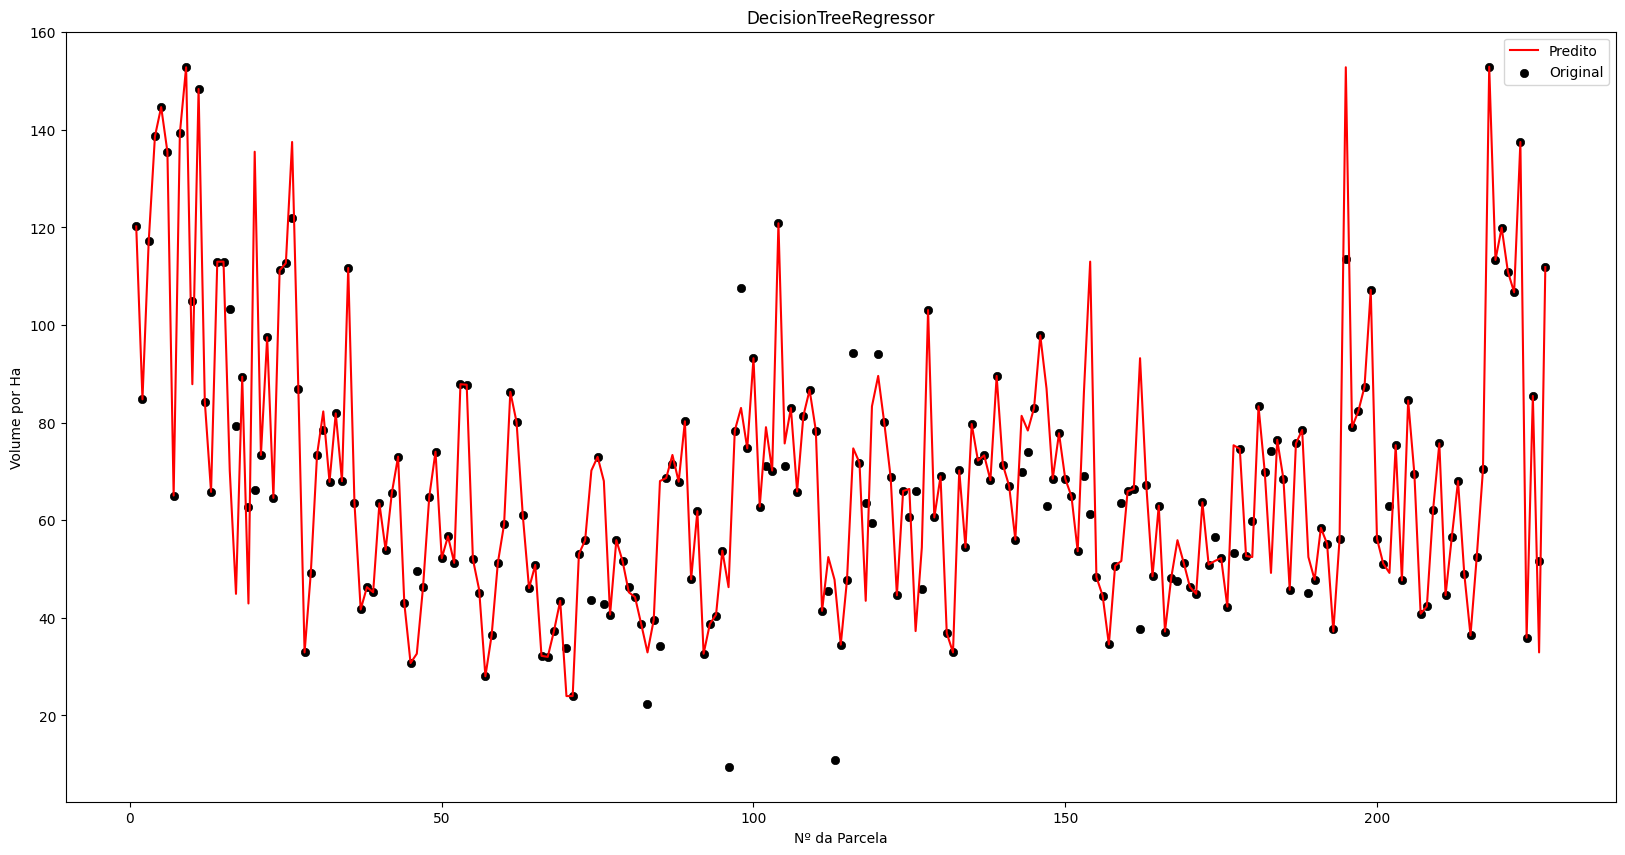

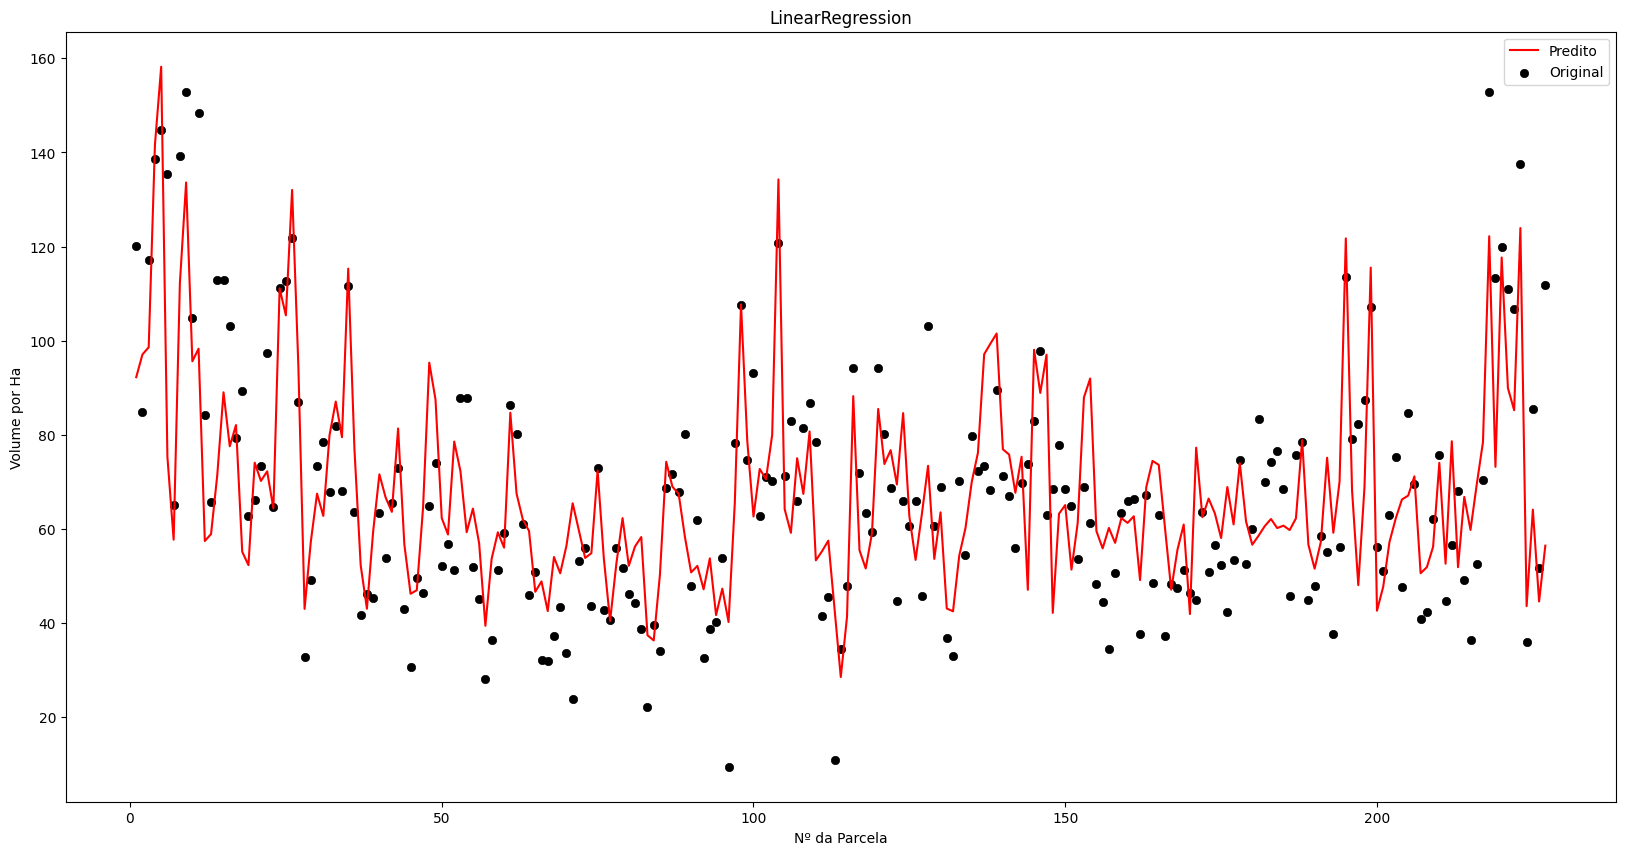

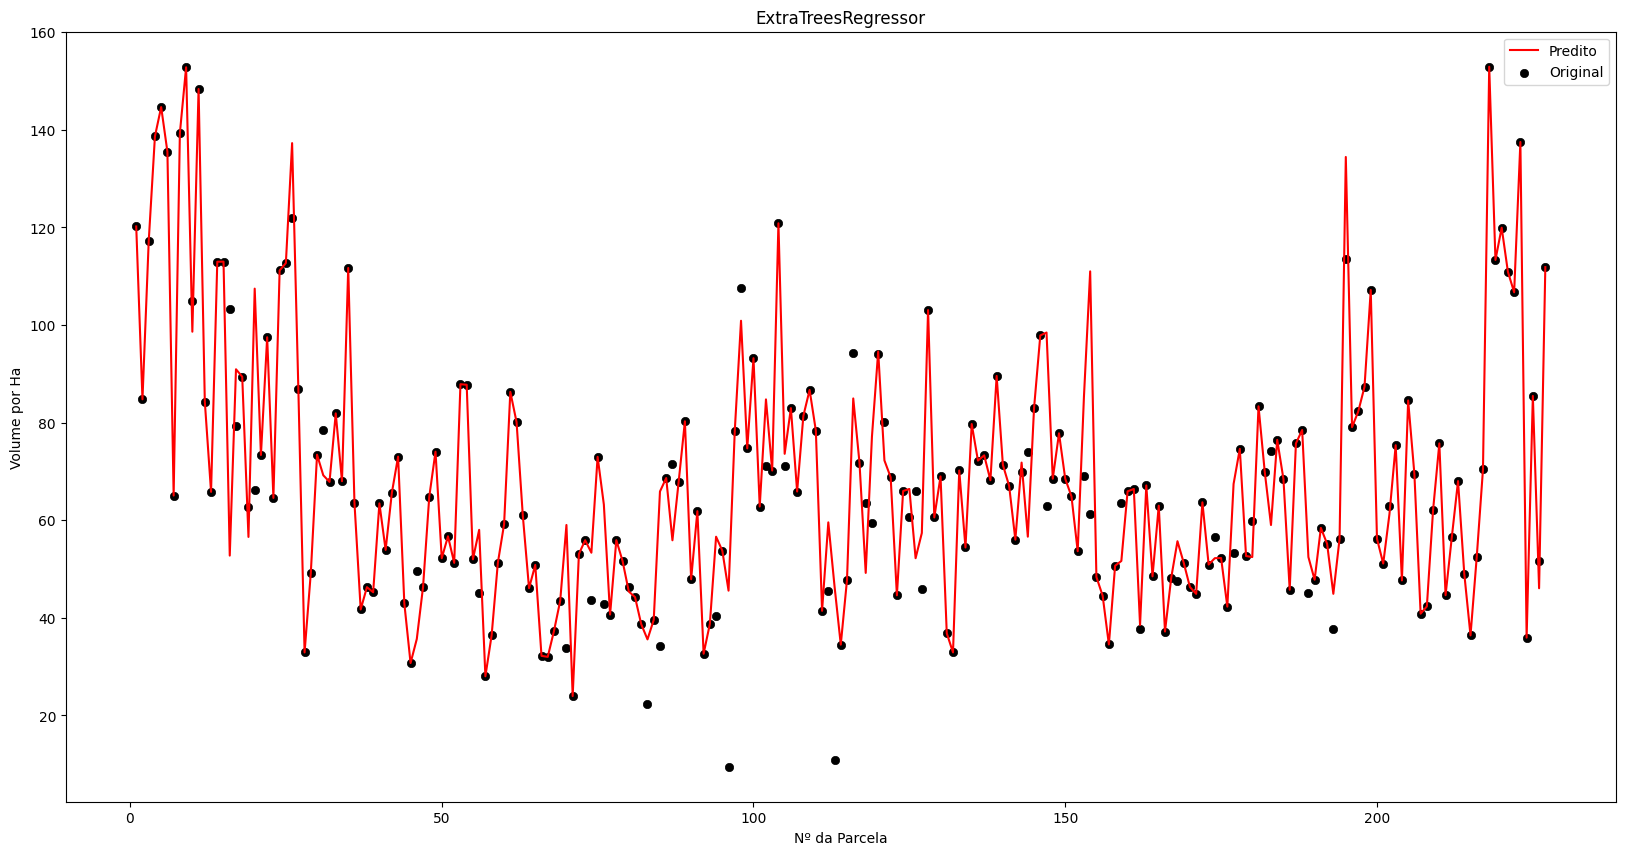

In [16]:
for name in predictions_list.keys():
  plt.figure(figsize=(20,10))
  plt.title(name)
  plt.xlabel('Nº da Parcela')
  plt.ylabel('Volume por Ha')
  plt.plot(dataframe['Parcela'], predictions_list[name], color='red', label='Predito')
  plt.scatter(dataframe['Parcela'], y, color = 'black', linewidth = .5, label='Original')
  plt.legend()
  plt.show()